# Matplotlib

This is the foundation of many plotting libraries

It is commonly imported with the alias **plt**

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [4]:
# We will use titanic dataset from before. 
# We know there are missing values we will drop those
titanic = sns.load_dataset('titanic')
titanic.dropna(inplace=True)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


In [5]:
titanic['pclass'].value_counts()

1    157
2     15
3     10
Name: pclass, dtype: int64

# Object Orientated API

* Follows python object model. To produce a plot we need to:
    * Create figure object
    * Create axes
    * Create plots withing object


### Scatter plot

Useful to see and correlations

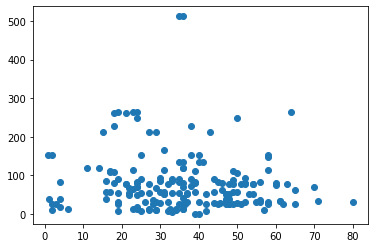

In [8]:
x = titanic['age']
y = titanic['fare']

fig = plt.figure()
ax = fig.add_subplot(1,1,1) #add_subplot(rows, columns, index)
ax.scatter(x, y)

plt.show() #this is implied on jupyter but will be needed on other IDE

In [12]:
first = titanic.groupby('pclass').get_group(1)
second = titanic.groupby('pclass').get_group(2)
third = titanic.groupby('pclass').get_group(3)

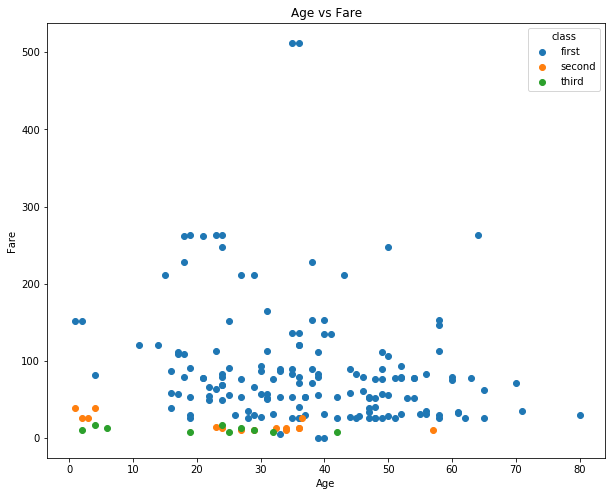

In [70]:
x = titanic['age']
y = titanic['fare']

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1, title = 'Age vs Fare') 
ax.scatter(first['age'], first['fare'], label='first')
ax.scatter(second['age'], second['fare'], label='second')
ax.scatter(third['age'], third['fare'], label='third')

ax.set_xlabel('Age')
ax.set_ylabel('Fare')

ax.legend(title='class')

plt.show()

# Simple API

* Do not need to create figure and axis object
* Less flexibility

### Bar chart

*  Display categorical variables

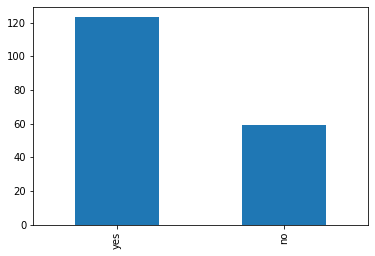

In [73]:
titanic['alive'].value_counts().plot(kind='bar')

### Box plot

* Spread of data
* Visualise any outliers
* Shows mean


Text(0.5, 1.0, 'Fare')

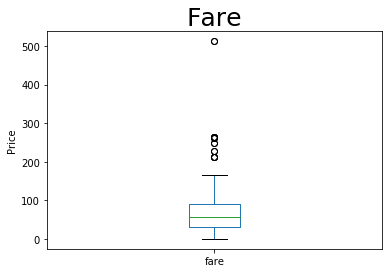

In [134]:
fare = titanic['fare'].plot(kind='box')
fare.set_ylabel('Price')
fare.set_title('Fare', fontsize=25)

### Histogram

* Spread of data

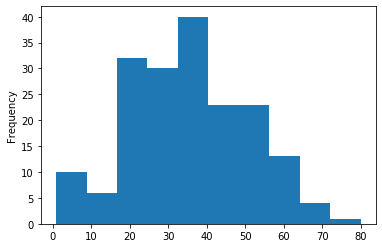

In [13]:
titanic['age'].plot(kind='hist')

# Seaborn

* User friendly visualisation
* Works with matplotlib

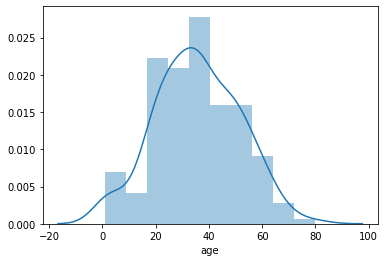

In [80]:
sns.distplot(titanic[''])

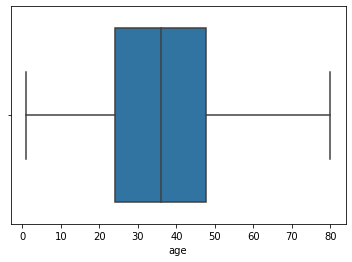

In [96]:
sns.boxplot(data=titanic, x = 'age')

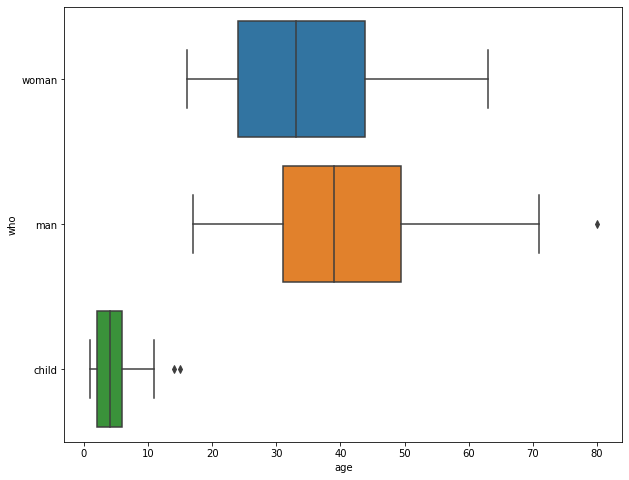

In [103]:
plt.figure(figsize=(10,8))
sns.boxplot(data=titanic, x = 'age', y='who')

### Violin plot

* Combine histogram and box plot
* Shows distribution

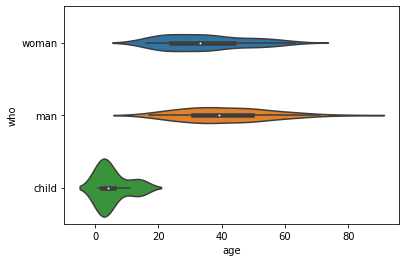

In [105]:
sns.violinplot(data=titanic, x='age', y='who')

In [109]:
titanic['pclass'].value_counts()

1    157
2     15
3     10
Name: pclass, dtype: int64

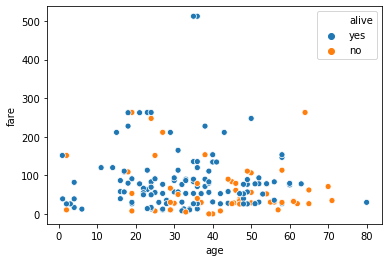

In [116]:
sns.scatterplot(data=titanic, x='age', y='fare', hue='alive')

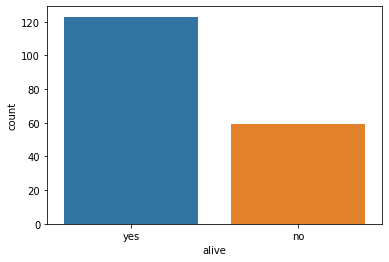

In [117]:
sns.countplot(data=titanic, x='alive')

### Regression plot

* Line of best fit with error

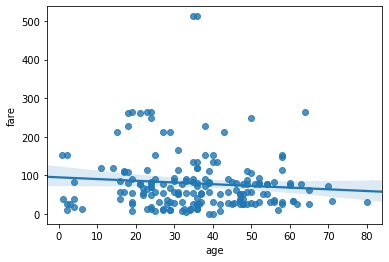

In [121]:
sns.regplot(data=titanic, x='age', y='fare')

### Heatmap

* Plot correlation between vaiables

In [126]:
corrs = titanic.corr()
corrs # correlation matrix

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.037698,-0.251045,0.101376,0.018739,0.130632,-0.582727,-0.111827
pclass,-0.037698,1.000000,-0.305708,-0.105262,0.046273,-0.316796,-0.122403,0.064678
age,-0.251045,-0.305708,1.000000,-0.154160,-0.269757,-0.090730,0.338384,0.203460
sibsp,0.101376,-0.105262,-0.154160,1.000000,0.253478,0.284841,-0.147610,-0.628796
parch,0.018739,0.046273,-0.269757,0.253478,1.000000,0.388540,-0.183689,-0.549197
fare,0.130632,-0.316796,-0.090730,0.284841,0.388540,1.000000,-0.114147,-0.298233
adult_male,-0.582727,-0.122403,0.338384,-0.147610,-0.183689,-0.114147,1.000000,0.193695
alone,-0.111827,0.064678,0.203460,-0.628796,-0.549197,-0.298233,0.193695,1.000000


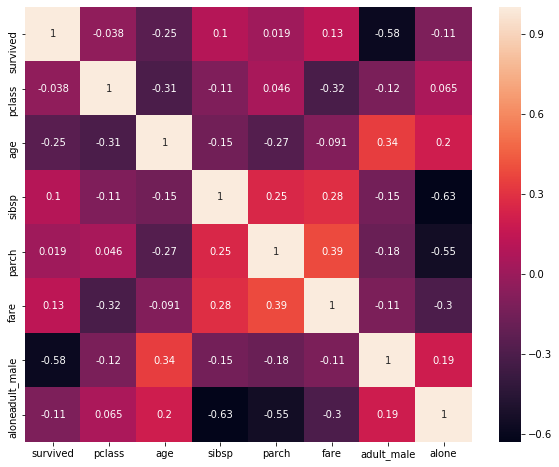

In [130]:
plt.figure(figsize=(10,8))
sns.heatmap(corrs, annot=True)
plt.autoscale()

# Exercise

* USing the dataset from the previous exercise create some useful visualisation and write a brief explanation of what it shows about your data